**Import the Data**

In [3]:
# Import necessary libraries.
import pandas as pd
import os 
import csv
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [4]:
# Set up URLs.
circuits_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/circuits.csv'
constructor_results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructor_results.csv'
constructor_standings_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructor_standings.csv'
constructors_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/constructors.csv'
driver_standings_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/driver_standings.csv'
drivers_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/drivers.csv'
lap_times_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/lap_times.csv'
pit_stop_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/pit_stops.csv'
qualifying_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/qualifying.csv'
races_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/races.csv'
results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/results.csv'
seasons_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/seasons.csv'
status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/status.csv'
race_status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/race_status.csv'
MasterData1_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/MasterData1.csv'

In [5]:
# Set up dataframes.
circuits_df = pd.read_csv(circuits_url, sep = ',', encoding = 'latin-1')
constructor_results_df = pd.read_csv(constructor_results_url, sep = ',', engine = 'python')
constructor_standings_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
constructors_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
driver_standings_df = pd.read_csv(driver_standings_url, sep = ',', engine = 'python')
lap_times_df = pd.read_csv(lap_times_url, sep = ',', engine = 'python')
pit_stop_df = pd.read_csv(pit_stop_url, sep = ',', engine = 'python')
qualifying_df = pd.read_csv(constructor_standings_url, sep = ',', engine = 'python')
results_df = pd.read_csv(results_url, sep = ',', engine = 'python')
seasons_df = pd.read_csv(seasons_url, sep = ',', engine = 'python')
status_df = pd.read_csv(status_url, sep = ',', engine = 'python')
races_df = pd.read_csv(races_url, sep = ',', engine = 'c')
drivers_df = pd.read_csv(drivers_url, sep = ',', encoding = 'latin-1')
race_status_df = pd.read_csv(race_status_url, sep = ',', engine = 'python')
MasterData1_df = pd.read_csv(MasterData1_url, sep = ',', engine = 'python', encoding = 'latin-1')

# **MasterData1 Evaluation**

In [6]:
MasterData1_df.head()

,grid,position,positionText,positionOrder,laps,milliseconds,fastestLap,rank,fastestLapSpeed,familyStatus,Completion Status,year,circuitId,country,alt,nationality
0,1,1,1,1,58,5690616,39,2,218.300,4,1,2008,1,Australia,10,British
1,5,2,2,2,58,5696094,41,3,217.586,4,1,2008,1,Australia,10,German
2,7,3,3,3,58,5698779,41,5,216.719,4,1,2008,1,Australia,10,German
3,11,4,4,4,58,5707797,58,7,215.464,4,1,2008,1,Australia,10,Spanish
4,3,5,5,5,58,5708630,43,1,218.385,4,1,2008,1,Australia,10,Finnish


In [7]:
# Assuming that Index is by Driver

In [8]:
print(MasterData1_df.columns.tolist())

['grid', 'position', 'positionText', 'positionOrder', 'laps', 'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed', 'familyStatus', 'Completion Status', 'year', 'circuitId', 'country', 'alt', 'nationality']


In [9]:
# Are we working with null values? 

In [10]:
MasterData1_df.isnull()

,grid,position,positionText,positionOrder,laps,milliseconds,fastestLap,rank,fastestLapSpeed,familyStatus,Completion Status,year,circuitId,country,alt,nationality
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25135,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25136,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25137,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# It does not seem like we are, but upon attempting to model, we were left with an error. 

In [12]:
#Replace \N with null value 

MasterData1_df = MasterData1_df.replace(r'\N', np.NaN)

#Replace null values with median value of that column

MasterData1_df["position"] = MasterData1_df["position"].fillna(MasterData1_df["position"].median())
MasterData1_df["circuitId"] = MasterData1_df["circuitId"].fillna(MasterData1_df["circuitId"].median())
MasterData1_df["rank"] = MasterData1_df["rank"].fillna(MasterData1_df["rank"].median())
MasterData1_df["grid"] = MasterData1_df["grid"].fillna(MasterData1_df["grid"].median())

**Modeling Objectives**

- Start off with Logistic Regression Model for Classification
- At first we want to predict Completion Status (Binary)
- Finished the race = 1
- Did not finish the race = 0
- Use small amount of variables based on intuition i.e:
- grid, position, circuitId, rank
- Visualize Findings & Evaluate Model
- Run data through a series of models and evaluate
- Evaluate Features, determine alterations for a better performing model. 

**Evaluating Classifiers**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [14]:
X = MasterData1_df[["grid", "position", "circuitId", "rank"]]

In [15]:
y = MasterData1_df["Completion Status"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

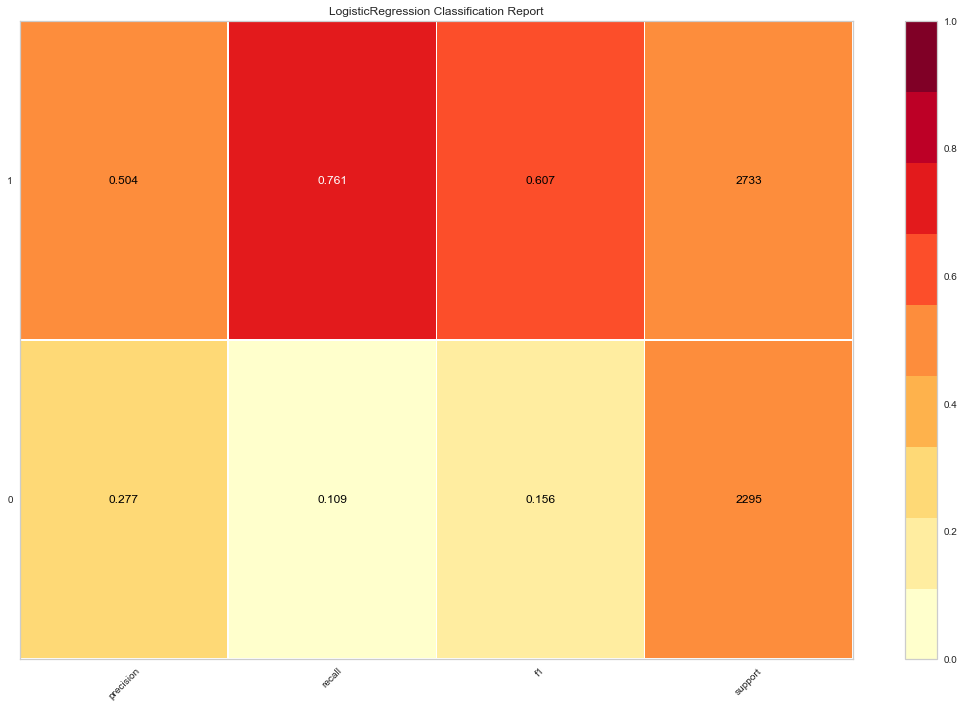

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [17]:
# Instantiate the classification model and visualizer
logreg = LogisticRegression()
visualizer = ClassificationReport(
    logreg, classes=[0,1], support=True, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

**Findings**
- For all instances that were actually positive, 78% percent was classified correctly
- 78% of the time the model is able to accurately predict when a driver would finish a race. 
- Why are the results for predicting non-finishes, "0", so poor?
- Messing with the classes object in visualizer greatly alters results, did I make a mistake with this?

**Evaluating Multiple Classifiers at Once**

In [18]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [19]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    X = MasterData1_df[["grid", "position", "circuitId", "rank"]]
    
    y = MasterData1_df["Completion Status"]
    
    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

models = [
    SVC(gamma='auto'), 
    NuSVC(gamma='auto'), 
    LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), 
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

SVC: 0.9424548176072736
NuSVC: 0.8680193665225265


/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


LinearSVC: 0.7093667104483761
SGDClassifier: 0.6614028862077123
KNeighborsClassifier: 0.9294183237316483
LogisticRegression: 0.6143437862950057
LogisticRegressionCV: 0.6143035512064811
BaggingClassifier: 0.965673023514164
ExtraTreesClassifier: 0.9680545718865323
RandomForestClassifier: 0.9683120724718063


In [20]:
#Based on this series of tests, the model that returned the highest F1 Score is the RandomForestClassifier with a score of 
0.9682886216466235


0.9682886216466235

In [21]:
#It seems so far that the most viable models are: RandomForestClassifier, ExtraTreesClassifier, and BaggingClassifier

**Visual Model Evaluation**

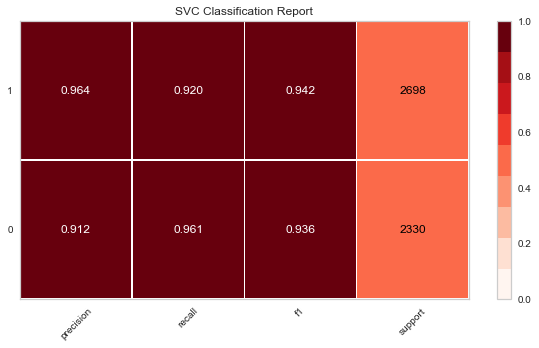

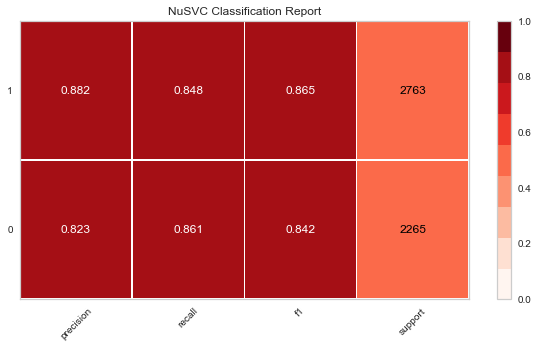

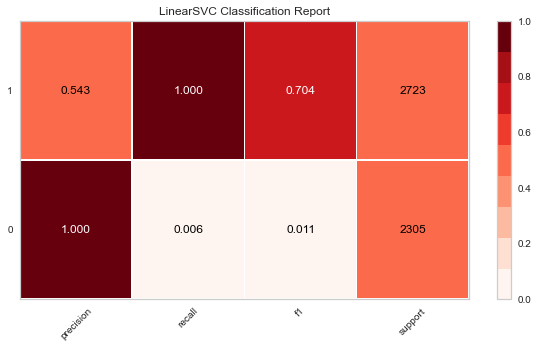

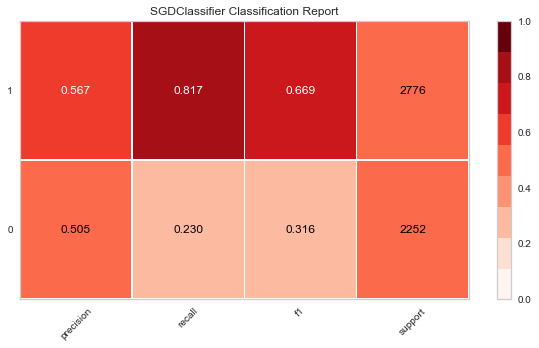

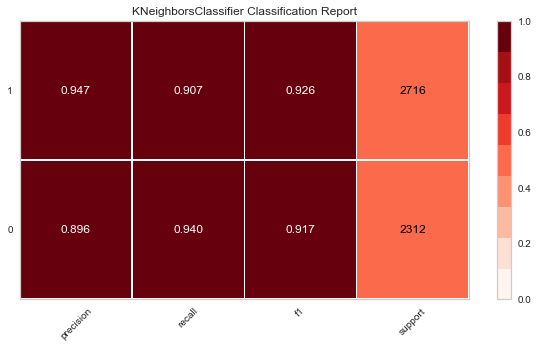

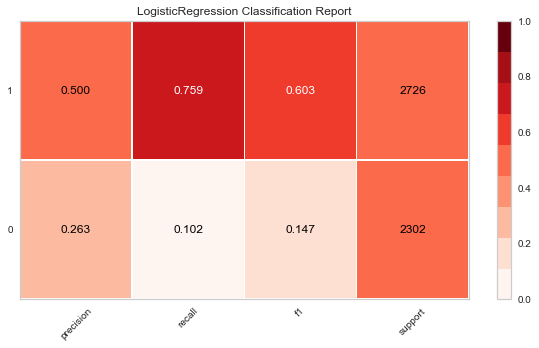

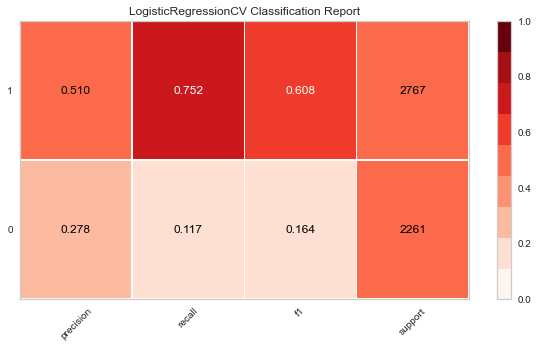

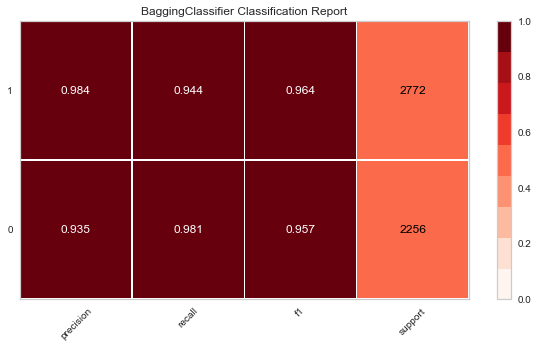

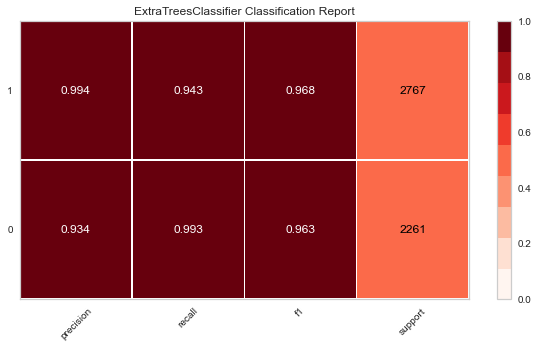

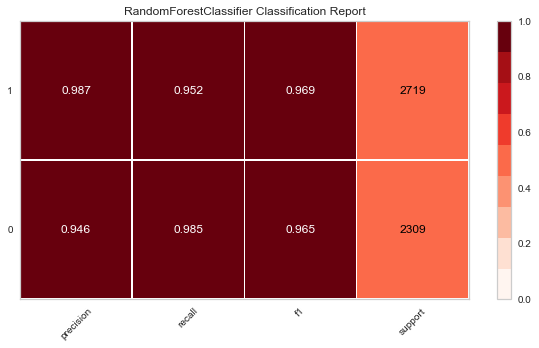

In [22]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    X = MasterData1_df[["grid", "position", "circuitId", "rank"]]
    y = MasterData1_df["Completion Status"]

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=[0,1], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

**Evaluating Features**

- We have intuitively selected features and have gotten certain models to run well based on these features. 
- This is good, but it would be better to arrive at these results via a systematic approach. 
- It is hard to come to conclusions about our data and what our features explain about our hypothesis.
- To get a better sense of our data we will use Recursive Feature Elimination, LASSO, or Tree Based evaluations.

In [23]:
#Recursive Feature Analysis

In [24]:
MasterData1_df.head()

,grid,position,positionText,positionOrder,laps,milliseconds,fastestLap,rank,fastestLapSpeed,familyStatus,Completion Status,year,circuitId,country,alt,nationality
0,1,1,1,1,58,5690616,39,2,218.300,4,1,2008,1,Australia,10,British
1,5,2,2,2,58,5696094,41,3,217.586,4,1,2008,1,Australia,10,German
2,7,3,3,3,58,5698779,41,5,216.719,4,1,2008,1,Australia,10,German
3,11,4,4,4,58,5707797,58,7,215.464,4,1,2008,1,Australia,10,Spanish
4,3,5,5,5,58,5708630,43,1,218.385,4,1,2008,1,Australia,10,Finnish


In [25]:
print(MasterData1_df.columns.tolist())

['grid', 'position', 'positionText', 'positionOrder', 'laps', 'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed', 'familyStatus', 'Completion Status', 'year', 'circuitId', 'country', 'alt', 'nationality']


In [27]:
#Replace \N with null value 

MasterData1_df = MasterData1_df.replace(r'\N', np.NaN)

#Replace null values with median value of that column

MasterData1_df["position"] = MasterData1_df["position"].fillna(MasterData1_df["position"].median())
MasterData1_df["circuitId"] = MasterData1_df["circuitId"].fillna(MasterData1_df["circuitId"].median())
MasterData1_df["rank"] = MasterData1_df["rank"].fillna(MasterData1_df["rank"].median())
MasterData1_df["grid"] = MasterData1_df["grid"].fillna(MasterData1_df["grid"].median())
MasterData1_df["milliseconds"] = MasterData1_df["milliseconds"].fillna(MasterData1_df["milliseconds"].median())
MasterData1_df["fastestLap"] = MasterData1_df["fastestLap"].fillna(MasterData1_df["fastestLap"].median())
MasterData1_df["fastestLapSpeed"] = MasterData1_df["fastestLapSpeed"].fillna(MasterData1_df["fastestLapSpeed"].median())
MasterData1_df["year"] = MasterData1_df["year"].fillna(MasterData1_df["year"].median())
MasterData1_df["alt"] = MasterData1_df["alt"].fillna(MasterData1_df["alt"].median())




In [40]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel

from yellowbrick.classifier import ClassificationReport
from sklearn.feature_selection import RFE

In [41]:
#set variables

X = MasterData1_df[["alt", "year", "fastestLapSpeed", "fastestLap", "milliseconds", "grid", "rank", "circuitId", "position"]]
y = MasterData1_df["Completion Status"]

In [47]:
#LASSO- Regularization

In [48]:
model = Lasso()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('alt', -0.0), ('year', 0.004217935355577432), ('fastestLapSpeed', 0.0), ('fastestLap', 0.0), ('milliseconds', 8.604598069934724e-08), ('grid', -0.0), ('rank', -0.0), ('circuitId', 0.0), ('position', 0.0)]


In [49]:
#What does this mean?

In [50]:
#Transformer

In [51]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['year']
